Тестовое задание:

Цель: разработать скрипт для сбора и обработки данных с использованием API Binance и прогнозирования временных рядов с помощью LSTM-модели.

Этапы выполнения задания:

1. Изучить документацию RESTful API Binance (https://binance-docs.github.io/apidocs/spot/en/) и написать скрипт на Python с использованием библиотеки Requests, чтобы получить данные о котировках криптовалют. Сохранить полученные данные в формате CSV.

2. Загрузить полученный CSV-файл с данными в Python с использованием библиотеки Pandas и выполнить предварительную обработку данных (например, удаление пропусков, преобразование даты и времени, масштабирование).

3. С использованием библиотеки NumPy, разделить данные на обучающую и тестовую выборки.

4. Создать и обучить LSTM-модель с использованием библиотеки Keras или TensorFlow на основе подготовленных данных. Подобрать архитектуру и гиперпараметры модели, чтобы достичь наилучшего качества прогнозирования.

5. Оценить качество модели на тестовой выборке, используя подходящие метрики, такие как среднеквадратичная ошибка (MSE) или средняя абсолютная ошибка (MAE).

6. Визуализировать предсказания модели для тестовой выборки на графике с помощью библиотеки Matplotlib или Plotly. Вывести график с предсказанием на час вперед от последних полученных данных.

In [1]:
import requests
from datetime import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [ ]:
api_key = ''
api_secret = ''
# задаем список торговых пар
symbols = ['BTCUSDT', 'ETHUSDT', 'BNBUSDT', 'XRPUSDT', 'LTCUSDT']
interval = '1d'
limit = 1000

for symbol in symbols:
    url = f'https://api.binance.com/api/v3/klines?symbol={symbol}&interval={interval}&limit={limit}'
    response = requests.get(url, headers={'X-MBX-APIKEY': api_key})

    if response.status_code == 200:
        info = response.json()
        data = pd.DataFrame(info)
        df = pd.DataFrame()
        df['date'] = data.iloc[:,0]
        df['date'] = pd.to_datetime(df['date'], unit='ms')
        df['open'] = data.iloc[:,1].astype(float)
        df['high'] = data.iloc[:,2].astype(float)
        df['low'] = data.iloc[:,3].astype(float)
        df['close'] = data.iloc[:,4].astype(float)
        df['volume_coin'] = data.iloc[:,5].astype(float)
        df['volume_usd'] = data.iloc[:,7].astype(float)
        df['trades'] = data.iloc[:,8].astype(float)
        df.to_csv(f'binance_quotes_{symbol}.csv', index=False)
        print(f'Данные сохранены по {symbol}')
    else:
        print(f"Ошибка запроса по {symbol}. HTTP статус: {response.status_code}")


Данные сохранены по BTCUSDT
Данные сохранены по ETHUSDT
Данные сохранены по BNBUSDT
Данные сохранены по XRPUSDT
Данные сохранены по LTCUSDT


In [2]:
# прочитаем полученные данные
df_btc = pd.read_csv('BTCUSDT_tf_1h.csv')
# df_eth = pd.read_csv('binance_quotes_ETHUSDT.csv')
# df_bnb = pd.read_csv('binance_quotes_BNBUSDT.csv')
# df_ltc = pd.read_csv('binance_quotes_LTCUSDT.csv')
# df_xrp = pd.read_csv('binance_quotes_XRPUSDT.csv')

Посторим графики цены, для каждой монеты

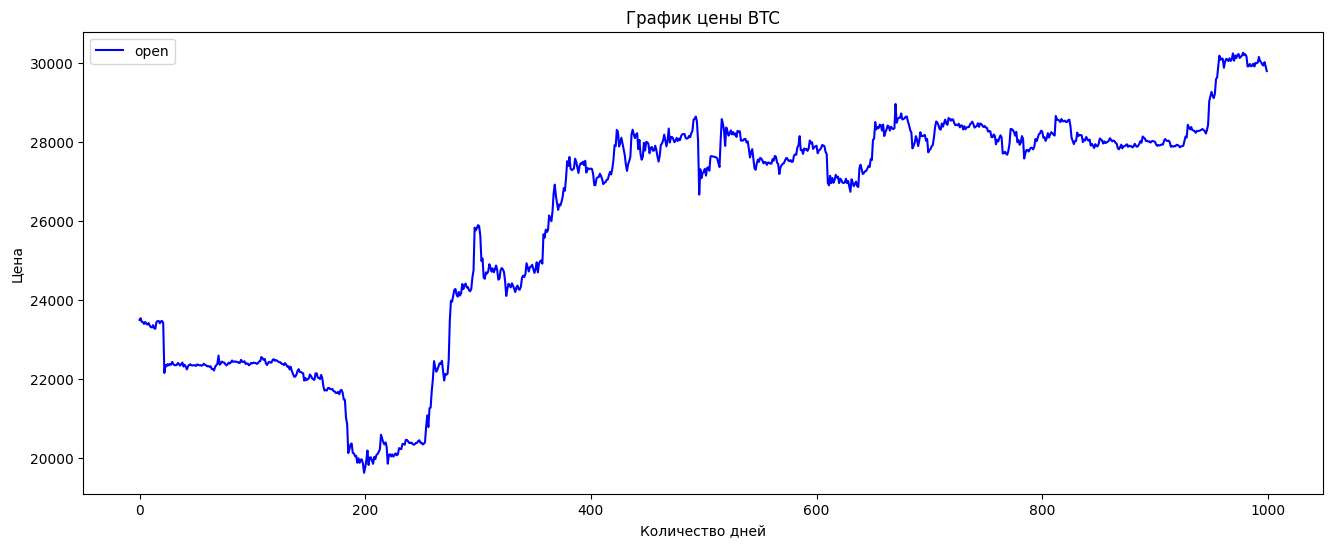

In [ ]:
# BTC

plt.figure(figsize=(16,6))
plt.plot(df_btc['open'], color="blue")
# plt.plot(df_btc['high'])
# plt.plot(df_btc['low'])
# plt.plot(df_btc['close'], color='red')
plt.title('График цены BTC')
plt.ylabel('Цена')
plt.xlabel('Количество часов')
plt.legend(['open', 'close'], loc='upper left')
plt.show()

In [ ]:
# # ETH
#
# plt.figure(figsize=(16,6))
# plt.plot(df_eth['open'], color='blue')
# # plt.plot(df_eth['high'])
# # plt.plot(df_eth['low'])
# # plt.plot(df_eth['close'])
# plt.title(f'График цены ETH')
# plt.ylabel('Цена')
# plt.xlabel('Количество дней')
# plt.legend(['open', 'close'], loc='upper left')
# plt.show()

In [ ]:
# # BNB
#
# plt.figure(figsize=(16,6))
# plt.plot(df_bnb['open'], color='blue')
# # plt.plot(df_bnb['high'])
# # plt.plot(df_bnb['low'])
# # plt.plot(df_bnb['close'])
# plt.title(f'График цены BNB')
# plt.ylabel('Цена')
# plt.xlabel('Количество дней')
# plt.legend(['open', 'close'], loc='upper left')
# plt.show()

In [ ]:
# # LTC
#
# plt.figure(figsize=(16,6))
# plt.plot(df_ltc['open'], color='blue')
# # plt.plot(df_ltc['high'])
# # plt.plot(df_ltc['low'])
# # plt.plot(df_ltc['close'])
# plt.title(f'График цены LTC')
# plt.ylabel('Цена')
# plt.xlabel('Количество дней')
# plt.legend(['open', 'close'], loc='upper left')
# plt.show()

In [ ]:
# # XRP
# plt.figure(figsize=(16,6))
# plt.plot(df_xrp['open'], color='blue')
# # plt.plot(df_xrp['high'])
# # plt.plot(df_xrp['low'])
# # plt.plot(df_xrp['close'])
# plt.title(f'График цены XRP')
# plt.ylabel('Цена')
# plt.xlabel('Количество дней')
# plt.legend(['open', 'close'], loc='upper left')
# plt.show()

Проверим, влияли ли количество объема, на изменение цены

<Axes: xlabel='date', ylabel='close'>

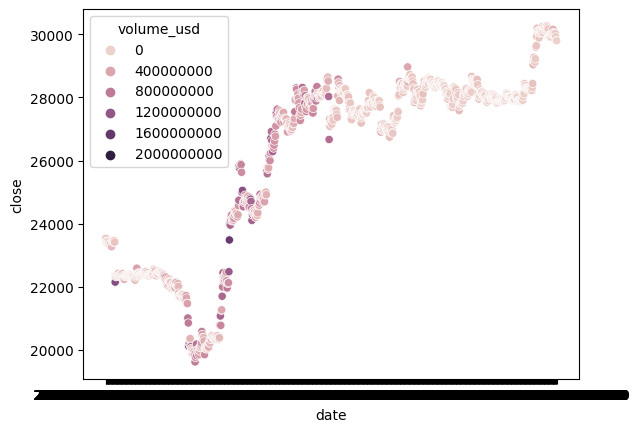

In [ ]:
# BTC
sns.scatterplot(data=df_btc, x='date', y='close', hue='volume_usd')

In [ ]:
# ETH
# sns.scatterplot(data=df_eth, x='date', y='close', hue='volume_usd')

In [ ]:
# BNB
# sns.scatterplot(data=df_bnb, x='date', y='close',hue='volume_usd')

In [ ]:
# LTC
# sns.scatterplot(data=df_ltc, x='date', y='close', hue='volume_usd')

In [ ]:
# XRP
# sns.scatterplot(data=df_xrp, x='date', y='close', hue='volume_usd')

Дальнейшая работа будет проводиться с данными по BTC

Разделение на тренировочный и тестовый. Нормализация данных

In [ ]:
df_btc

,date,open,high,low,close,volume_coin,volume_usd,trades
0,2023-03-02 04:00:00,23494.29,23546.82,23469.43,23536.33,4693.64663,1.103089e+08,199614.0
1,2023-03-02 05:00:00,23536.34,23544.76,23410.65,23445.71,6316.91756,1.482940e+08,230958.0
2,2023-03-02 06:00:00,23445.48,23474.35,23374.46,23437.86,8081.01585,1.893840e+08,294140.0
3,2023-03-02 07:00:00,23437.86,23448.08,23335.41,23391.87,8862.36324,2.073082e+08,307116.0
4,2023-03-02 08:00:00,23391.87,23466.68,23347.76,23443.67,9464.04322,2.215266e+08,335283.0
...,...,...,...,...,...,...,...,...
995,2023-04-12 16:00:00,29964.03,30034.99,29915.01,29939.02,1972.26301,5.910413e+07,44798.0
996,2023-04-12 17:00:00,29939.02,30091.01,29907.14,30023.92,2066.73716,6.201826e+07,44733.0
997,2023-04-12 18:00:00,30023.93,30057.52,29845.01,29917.26,2390.44208,7.162752e+07,58331.0
998,2023-04-12 19:00:00,29917.27,29949.76,29760.13,29798.59,2099.05832,6.269009e+07,46671.0


In [3]:
num_shape = 800

# возьмём цену открытия
train = df_btc.iloc[:num_shape, 1:2].values
test = df_btc.iloc[num_shape:, 1:2].values

train.shape, test.shape

((800, 1), (200, 1))

In [4]:
scaler = MinMaxScaler(feature_range = (0, 1))

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.fit_transform(test)

In [5]:
X_train = []
y_train = []

time_step = 60

for i in range(time_step, num_shape):
    X_train_ = np.reshape(train_scaled[i - time_step:i, 0], (time_step, 1))
    X_train.append(X_train_)
    y_train.append(train_scaled[i, 0])
X_train = np.stack(X_train)
y_train = np.stack(y_train)

Создаём модель

In [6]:
epochs = 100
batch = 32
lr = 0.0001
adam = tf.keras.optimizers.Adam(lr)

In [7]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(256, input_shape=(X_train.shape[1], 1), return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(192, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)
])

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 256)           264192    
                                                                 
 dropout (Dropout)           (None, 60, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 192)           344832    
                                                                 
 dropout_1 (Dropout)         (None, 60, 192)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 128)           164352    
                                                                 
 dropout_2 (Dropout)         (None, 60, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                4

In [8]:
model_lstm.compile(optimizer=adam, loss='mean_squared_error')

In [ ]:
# callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0.01, patience=10, verbose=1)]

In [9]:
history = model_lstm.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
24/24 [==============================] - 12s 20ms/step - loss: 0.1616
Epoch 2/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0203
Epoch 3/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0143
Epoch 4/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0128
Epoch 5/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0115
Epoch 6/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0112
Epoch 7/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0110
Epoch 8/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0105
Epoch 9/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0104
Epoch 10/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0114
Epoch 11/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0098
Epoch 12/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0102
Epoch 13/100
24/24 [====

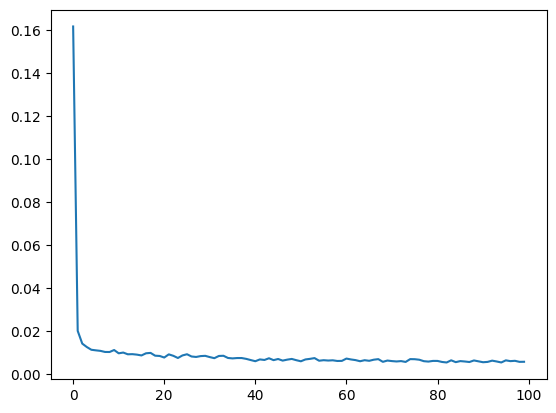

In [10]:
plt.plot(history.history['loss'])

Предсказание

In [11]:
df_volume = np.vstack((train, test))

In [12]:
inputs = df_volume[df_volume.shape[0] - test.shape[0] - time_step:]
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

inputs.shape

(260, 1)

In [13]:
num_2 = df_volume.shape[0] - num_shape + time_step

X_test = []

for i in range(time_step, num_2):
    X_test_ = np.reshape(inputs[i - time_step:i, 0], (time_step, 1))
    X_test.append(X_test_)

In [14]:
X_test = np.stack(X_test)

In [15]:
predict = model_lstm.predict(X_test)
predict = scaler.inverse_transform(predict)

7/7 [==============================] - 1s 11ms/step


In [16]:
predict.shape

(200, 1)

In [17]:
test_rmse = np.sqrt(mean_squared_error(test, predict))

In [18]:
test_rmse

286.57415110034157

Получается, ошибка примерно в 300$

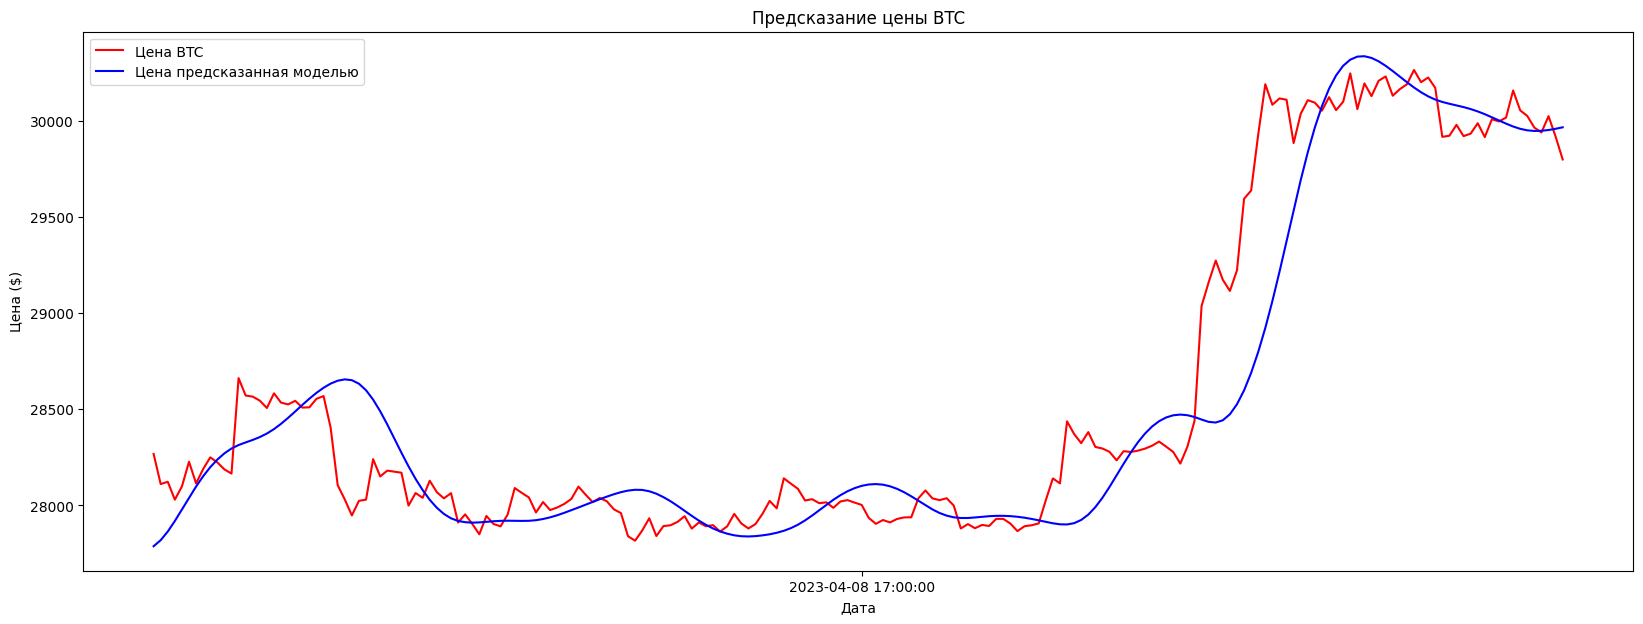

In [19]:
plt.figure(figsize=(20,7))
plt.plot(df_btc['date'].values[800:], df_volume[800:], color = 'red', label = 'Цена BTC ')
plt.plot(df_btc['date'][-predict.shape[0]:].values, predict, color = 'blue', label = 'Цена предсказанная моделью')
plt.xticks(np.arange(100, df_btc[800:].shape[0],200))
plt.title('Предсказание цены BTC')
plt.xlabel('Дата')
plt.ylabel('Цена ($)')
plt.legend()
plt.show()

Предсказание на 5 часов

In [20]:
pred_ = predict[-1].copy()
prediction_full = []
df_copy = df_btc.iloc[:, 1:2][1:].values

for j in range(5):
    df_ = np.vstack((df_copy, pred_))
    train_ = df_[:num_shape]
    test_ = df_[num_shape:]
    
    df_volume_ = np.vstack((train_, test_))

    inputs_ = df_volume_[df_volume_.shape[0] - test_.shape[0] - time_step:]
    inputs_ = inputs_.reshape(-1,1)
    inputs_ = scaler.transform(inputs_)

    X_test_2 = []

    for k in range(time_step, num_2):
        X_test_3 = np.reshape(inputs_[k-time_step:k, 0], (time_step, 1))
        X_test_2.append(X_test_3)

    X_test_ = np.stack(X_test_2)
    predict_ = model_lstm.predict(X_test_)
    pred_ = scaler.inverse_transform(predict_)
    prediction_full.append(pred_[-1][0])
    df_copy = df_[j:]

7/7 [==============================] - 0s 10ms/step


In [21]:
prediction_full_new = np.vstack((predict, np.array(prediction_full).reshape(-1, 1)))


In [22]:
prediction_full_new

array([[27787.938],
       [27819.344],
       [27864.3  ],
       [27919.11 ],
       [27979.203],
       [28039.828],
       [28098.363],
       [28151.922],
       [28198.771],
       [28238.354],
       [28270.754],
       [28295.883],
       [28313.922],
       [28327.613],
       [28340.512],
       [28355.414],
       [28373.863],
       [28396.78 ],
       [28424.354],
       [28455.514],
       [28488.479],
       [28522.387],
       [28555.105],
       [28585.25 ],
       [28611.607],
       [28633.285],
       [28648.455],
       [28655.387],
       [28651.086],
       [28632.615],
       [28598.785],
       [28550.154],
       [28489.602],
       [28421.076],
       [28347.857],
       [28274.02 ],
       [28203.271],
       [28137.814],
       [28079.705],
       [28029.145],
       [27987.812],
       [27955.725],
       [27933.04 ],
       [27919.453],
       [27912.82 ],
       [27910.42 ],
       [27911.771],
       [27914.688],
       [27917.68 ],
       [27919.762],


In [23]:
df_date = df_btc[['date']]

for h in range(5):
    df_date_add = pd.to_datetime(df_date['date'].iloc[-1]) + pd.DateOffset(days=1)
    df_date_add = pd.DataFrame([df_date_add.strftime("%Y-%m-%d")], columns=['date'])
    df_date = df_date.append(df_date_add)
df_date = df_date.reset_index(drop=True)

<ipython-input-23-2b6ebf15550d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-23-2b6ebf15550d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-23-2b6ebf15550d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-23-2b6ebf15550d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_date = df_date.append(df_date_add)
<ipython-input-23-2b6ebf15550d>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


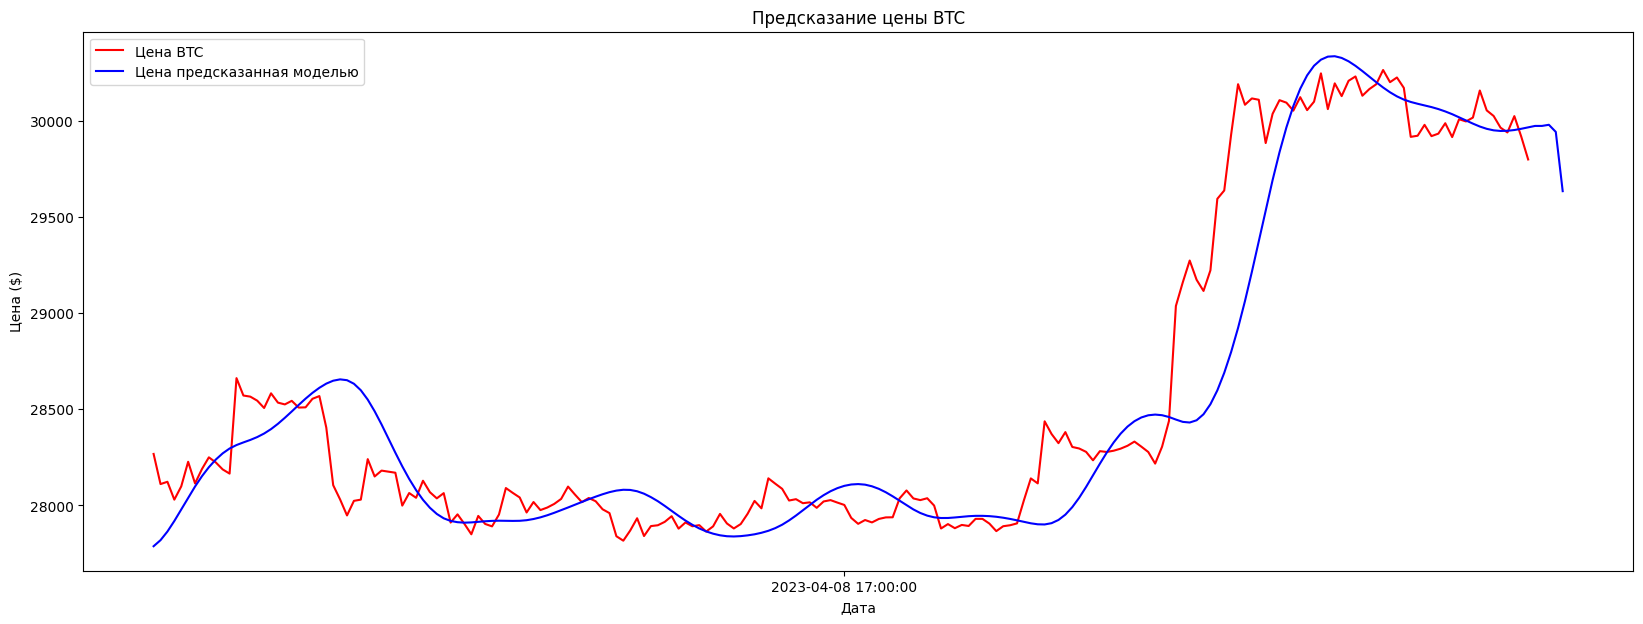

In [24]:
plt.figure(figsize=(20,7))
plt.plot(df_btc['date'].values[800:], df_volume[800:], color = 'red', label = 'Цена BTC')
plt.plot(df_date['date'][-prediction_full_new.shape[0]:].values, prediction_full_new, color = 'blue', label = 'Цена предсказанная моделью')
plt.xticks(np.arange(100,df_btc[800:].shape[0],200))
plt.title('Предсказание цены BTC')
plt.xlabel('Дата')
plt.ylabel('Цена ($)')
plt.legend()
plt.show()